In [8]:
# !pip install librosa
import librosa
import matplotlib.pyplot as plt
y, sr = librosa.load(librosa.util.example_audio_file())
S = librosa.feature.melspectrogram(y=y, sr=sr)
print("S *************************")
print(S)
spectrogram = librosa.power_to_db(S)
print("spectrogram *************************")
print(spectrogram)


S *************************
[[2.63330644e-07 2.54545751e-03 6.94285062e-02 ... 3.34132614e-08
  1.35390816e-08 7.23030095e-10]
 [1.48204295e-07 1.16257764e-02 1.33231536e+00 ... 2.57257016e-07
  9.53164997e-08 1.18527171e-09]
 [3.64170428e-07 2.34068424e-02 5.07212652e+00 ... 1.63250639e-06
  3.06545325e-07 1.45464843e-09]
 ...
 [3.65634363e-10 2.85678891e-08 2.12918571e-06 ... 2.84671318e-11
  7.83192729e-12 1.15972642e-13]
 [1.95074737e-10 9.91002192e-09 6.60153368e-07 ... 7.60728008e-12
  2.06383002e-12 2.43639214e-14]
 [8.62272286e-12 2.35881969e-10 4.41610791e-08 ... 6.06083903e-13
  1.94372364e-13 3.81628595e-15]]
spectrogram *************************
[[-46.22227144 -25.94234148 -11.58462179 ... -46.22227144 -46.22227144
  -46.22227144]
 [-46.22227144 -19.34578035   1.24607033 ... -46.22227144 -46.22227144
  -46.22227144]
 [-46.22227144 -16.30657169   7.05190078 ... -46.22227144 -46.22227144
  -46.22227144]
 ...
 [-46.22227144 -46.22227144 -46.22227144 ... -46.22227144 -46.222271

In [13]:
S.shape

(128, 2647)

In [14]:
spectrogram.shape

(128, 2647)

2647 128


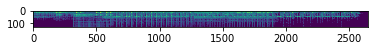

In [15]:
from PIL import Image
file_path="spectro.png"
plt.imsave(file_path, arr=spectrogram)
img = Image.open(file_path)
imgWidth = img.size[0]
imgHeight = img.size[1]

print(imgWidth, imgHeight)
plt.imshow(img)

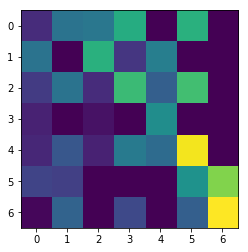

In [17]:
import numpy as np
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)
plt.show()

5 128
(128, 2, 4)
(128, 2)
(128,)


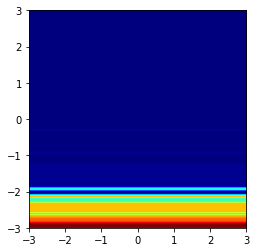

[0.6  0.61 0.61 0.53 0.49 0.49 0.45 0.43 0.26 0.43 0.43 0.43 0.43 0.43
 0.43 0.27 0.26 0.26 0.43 0.24 0.01 0.01 0.23 0.24 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.01 0.01 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [40]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy.cluster.vq as scv

def colormap2arr(arr,cmap):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    gradient=cmap(np.linspace(0.0,1.0,100))

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    values=code.astype('float')/gradient.shape[0]

    # Reshape values back to (240,240)
    values=values.reshape(arr.shape[0],arr.shape[1])
    values=values[::-1]
    return values

arr=plt.imread("rightEdge.png")
# Store the image's width and height for later use. 
imgWidth = 5
imgHeight = 128

print(imgWidth, imgHeight)

leftPart=arr[:,int(np.around(imgWidth/2)):(imgWidth-1),:]

print(leftPart.shape)

values=colormap2arr(leftPart,cm.jet)    

print(values.shape)

avgValues=np.mean(values, axis=1, dtype=np.float32)

print(avgValues.shape)

# Proof that it works:
plt.imshow(values,interpolation='bilinear', cmap=cm.jet,
           origin='lower', extent=[-3,3,-3,3])
plt.show()

print(avgValues)

In [39]:
print(avgValues)

0.07171875


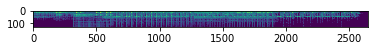

In [19]:
plt.imshow(Image.open('spectro.png'))

[[[ 71  22 105 255]
  [ 71  22 105 255]
  [ 71  22 105 255]
  [ 71  22 105 255]
  [ 71  22 105 255]]

 [[ 72  29 111 255]
  [ 72  29 111 255]
  [ 72  29 111 255]
  [ 72  29 111 255]
  [ 72  29 111 255]]

 [[ 72  29 111 255]
  [ 72  29 111 255]
  [ 72  29 111 255]
  [ 72  29 111 255]
  [ 72  29 111 255]]

 ...

 [[218 226  24 255]
  [218 226  24 255]
  [218 226  24 255]
  [218 226  24 255]
  [218 226  24 255]]

 [[215 226  25 255]
  [215 226  25 255]
  [215 226  25 255]
  [215 226  25 255]
  [215 226  25 255]]

 [[207 225  28 255]
  [207 225  28 255]
  [207 225  28 255]
  [207 225  28 255]
  [207 225  28 255]]]


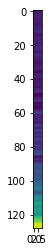